In [ ]:
!pip install numpy==1.23.1
!pip install pandas==1.4.3
!pip install matplotlib==3.3.2
!pip install seaborn==0.11.0

^C
  Using cached numpy-1.23.1.tar.gz (10.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'


ERROR: Exception:
Traceback (most recent call last):
  File "E:\11Estate-Price\modular_code\myenv\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "E:\11Estate-Price\modular_code\myenv\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\11Estate-Price\modular_code\myenv\Lib\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "E:\11Estate-Price\modular_code\myenv\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "E:\11Estate-Price\modular_code\myenv\Lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 546, in resolve
    state = resolutio

# EDA:

The first step in any Data Science project is to understand the data that is given to us. There are few standard questions you can ask in order to get the understanding:
* What is the size of the dataset?
* What is the time range of the data?
* What is the meaning of each column and its values in the dataset? (can get this information from Data Dictionary)
* What is the distribution and unique values for each column? (univariate analysis)
* What is the distribution and unique values for some combinations of columns? (bivariate & multivariate analysis)

If you try to answer these questions with the help of data, then you would get a good understanding of the data which can be leveraged in **Feature Engineering** & **Model Building** part of the project.

# Contents:

I. [Loading the Data:](#Loading-the-Data:)

II. [Data Preprocessing:](#Data-Preprocessing:)

* [Extracting Location details:](#Extracting-Location-details:)

* [Cleaning all the text columns in the data:](#Cleaning-all-the-text-columns-in-the-data:)

* [Encoding Binary Features:](#Encoding-Binary-Features:)

* [Fixing Numerical Features:](#Fixing-Numerical-Features:)

III. [Univariate Analysis:](#Univariate-Analysis:)


*  [Distribution of Location and Sub-Area:](#Distribution-of-Location-and-Sub-Area:)

* [Distribution of Company and Township:](#Distribution-of-Company-and-Township:)

* [Distribution of Property Area and Price:](#Distribution-of-Property-Area-and-Price:)

    
    
IV. [Multivariate Analysis:](#Multivariate-Analysis:)

* [How Property area correlates with the price?](#How-Property-area-correlates-with-the-price?)

* [How each amenities correlates with the price?](#How-each-amenities-correlates-with-the-price?)

* [What are the 3 main amenities that the top 10% priced properties have?](#What-are-the-3-main-amenities-that-the-top-10%-priced-properties-have?)

V. [Treating Nulls and saving the data:](#Treating-Nulls-and-saving-the-data:)

## Loading the Data:

([Contents:](#Contents:))

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Loading the data
data= pd.read_excel('E:/11Estate-Price/modular_code/input/Pune Real Estate Data.xlsx')
print(data.shape)
data.head()

(200, 18)


,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...


In [9]:
df = data.copy()

## Data Preprocessing:

#### Extracting Location details:

([Contents:](#Contents:))

In [10]:
df['Location'].apply(lambda x: x.split(',')[2].lower().strip())

0      india
1      india
2      india
3      india
4      india
5      india
6      india
7      india
8      india
9      india
10     india
11     india
12     india
13     india
14     india
15     india
16     india
17     india
18     india
19     india
20     india
21     india
22     india
23     india
24     india
25     india
26     india
27     india
28     india
29     india
30     india
31     india
32     india
33     india
34     india
35     india
36     india
37     india
38     india
39     india
40     india
41     india
42     india
43     india
44     india
45     india
46     india
47     india
48     india
49     india
50     india
51     india
52     india
53     india
54     india
55     india
56     india
57     india
58     india
59     india
60     india
61     india
62     india
63     india
64     india
65     india
66     india
67     india
68     india
69     india
70     india
71     india
72     india
73     india
74     india
75     india
76     india

In [11]:
# Extracting State and Country separately from the Location Column
df['City'] = df['Location'].apply(lambda x: x.split(',')[0].lower().strip())
df['State'] = df['Location'].apply(lambda x: x.split(',')[1].lower().strip())
df['Country'] = df['Location'].apply(lambda x: x.split(',')[2].lower().strip())
df.head(3)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...,pune,maharashtra,india


#### Cleaning all the text columns in the data:

([Contents:](#Contents:))

##### Property Type:

In [12]:
df['Propert Type'].value_counts()

Propert Type
2bhk           56
3BHK           28
3bhk           19
2BHK           18
2 bhk          16
3 bhk          10
1BHK            9
1bhk            7
1 BHK           3
2bhk            3
2.5 BHK         2
3 BHK           2
3.5bhk          2
2.5 bhk         2
4 bhk           2
3.5 bhk         2
5BHK            2
2 bhk           2
shop            1
3  bhk          1
6BHK            1
3 BHK Grand     1
2 BHK           1
4BHK            1
1 bhk           1
3 BHK           1
3bhk            1
2+2 bhk         1
3+2bhk          1
5 bhk           1
1bhk            1
4.5bhk          1
4bhk            1
Name: count, dtype: int64

In [13]:
# Regex to match the numbers and create a separate column
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)") 
df['Property Type Cleaned'] = df['Propert Type'].apply(lambda x: numbers.findall(x)[0] 
                                                       if len(numbers.findall(x)) > 0 else 0)

In [14]:
df['Property Type Cleaned'].value_counts()

Property Type Cleaned
2      97
3      64
1      21
4       4
3.5     4
2.5     4
5       3
6       1
0       1
4.5     1
Name: count, dtype: int64

##### Sub-Area:

In [15]:
df['Sub-Area'].value_counts()

Sub-Area
Kharadi                     16
handewadi                   11
BT Kawade RD                10
Hinjewadi                    9
wadgaon sheri                9
Ravet                        9
hadapsar                     8
NIBM                         8
BANER                        7
vimannagar                   6
bavdhan budruk               6
kiwale                       6
Susgaon                      6
bavdhan                      6
pisoli                       6
Akurdi                       6
Karvanagar                   5
manjri                       5
Mundhwa                      5
Mahalunge                    5
dhanori                      4
Bavdhan                      4
Balewadi                     4
tathawade                    4
mahalunge                    4
Keshav Nagar                 3
baner                        3
ravet                        3
KirkatWadi Sinhagad Road     3
Koregaon Park                2
Baner                        2
Undri                        2

In [16]:
# Number of categories before cleaning
len(df['Sub-Area'].value_counts())

39

In [17]:
df['Sub-Area Cleaned'] = df['Sub-Area'].apply(lambda x: x.lower().strip())

In [18]:
# Number of categories after cleaning
len(df['Sub-Area Cleaned'].value_counts())

34

##### Company Name:

In [19]:
# Number of categories before cleaning
len(df['Company Name'].value_counts())

37

In [20]:
df['Company Name Cleaned'] = df['Company Name'].apply(lambda x: x.lower().strip())

In [21]:
len(df['Company Name Cleaned'].value_counts())

37

##### TownShip Name/ Society Name:

In [22]:
# Number of categories before cleaning
len(df['TownShip Name/ Society Name'].value_counts())

54

In [23]:
df['TownShip Name/ Society Name Cleaned'] = df['TownShip Name/ Society Name'].apply(lambda x: x.lower().strip())

In [24]:
len(df['TownShip Name/ Society Name Cleaned'].value_counts())

54

##### Description:

In [25]:
df['Description Cleaned'] = df['Description'].apply(lambda x: x.lower().strip())

In [26]:
df.head(2)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...


#### Encoding Binary Features:

[Contents:](#Contents:)

In [27]:
# Cleaning and encoding Binary Features
df['ClubHouse Cleaned'] = (df['ClubHouse'].apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['School / University in Township Cleaned'] = (df['School / University in Township ']
                                                     .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['Hospital in TownShip Cleaned'] = (df['Hospital in TownShip']
                                                     .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['Mall in TownShip Cleaned'] = (df['Mall in TownShip']
                                                     .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['Park / Jogging track Cleaned'] = (df['Park / Jogging track']
                                                     .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['Swimming Pool Cleaned'] = (df['Swimming Pool']
                                                 .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['Gym Cleaned'] = (df['Gym']
                             .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))

In [28]:
df.tail()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned
195,196,"Pune, Maharashtra, India",BANER,3bhk,1300 to 1400,160,16.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes,SUPREME ESTIA - the name itself emanates a fee...,pune,maharashtra,india,3,baner,supreme,supreme estia,supreme estia - the name itself emanates a fee...,1,0,0,0,1,1,1
196,197,"Pune, Maharashtra, India",BANER,4bhk,1600 +,230,23.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes,Not every day would you come across a developm...,pune,maharashtra,india,4,baner,supreme,supreme estia,not every day would you come across a developm...,1,0,0,0,1,1,1
197,198,"Pune, Maharashtra, India",BANER,2 bhk,769 to 809,95,9.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes,A lifestyle of abundance that fourishes amidst...,pune,maharashtra,india,2,baner,tejraaj group,tej elevia,a lifestyle of abundance that fourishes amidst...,0,0,0,0,1,1,1
198,199,"Pune, Maharashtra, India",BANER,3 bhk,1101 to 1113,135,13.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes,"We are proud of it.We are sure, you will fall ...",pune,maharashtra,india,3,baner,tejraaj group,tej elevia,"we are proud of it.we are sure, you will fall ...",0,0,0,0,1,1,1
199,200,"Pune, Maharashtra, India",BANER,2bhk,776,90.68,9.068,VTP Reality,vtp solitaire,NaN,yes,no,no,no,yes,yes,yes,"A beautiful collection of ultra-modern homes, ...",pune,maharashtra,india,2,baner,vtp reality,vtp solitaire,"a beautiful collection of ultra-modern homes, ...",1,0,0,0,1,1,1


#### Fixing Numerical Features:

[Contents:](#Contents:)

##### Property Area:

In [29]:
numbers.findall(str("shot/tea"))

[]

In [31]:
def avg_property_area(x):
    x = numbers.findall(x)
    if len(x) == 1:
        return np.float64(x[0])  # Sử dụng np.float64
    elif len(x) == 2:
        return (np.float64(x[0]) + np.float64(x[1])) / 2  # Sử dụng np.float64
    return -99  # Hoặc giá trị mặc định nào đó

    
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)")     
df['Property Area in Sq. Ft. Cleaned'] = df['Property Area in Sq. Ft.'].apply(lambda x: avg_property_area(str(x)))

In [32]:
df[['Property Area in Sq. Ft.','Property Area in Sq. Ft. Cleaned']].sample(5)

,Property Area in Sq. Ft.,Property Area in Sq. Ft. Cleaned
152,691,691.0
133,726,726.0
199,776,776.0
37,882,882.0
104,1272,1272.0


##### Price:

In [34]:
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)") 
df['Price in lakhs Cleaned'] = (df['Price in lakhs'].apply(lambda x: np.float64(numbers.findall(str(x))[0]) 
                                                           if len(numbers.findall(str(x)))>0 else np.nan ))

In [35]:
df[['Price in lakhs','Price in lakhs Cleaned']].sample(5)

,Price in lakhs,Price in lakhs Cleaned
56,45.5,45.5
36,90,90.0
125,78,78.0
53,51,51.0
10,135,135.0


In [36]:
df.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Sr. No.                                  200 non-null    int64  
 1   Location                                 200 non-null    object 
 2   Sub-Area                                 200 non-null    object 
 3   Propert Type                             200 non-null    object 
 4   Property Area in Sq. Ft.                 200 non-null    object 
 5   Price in lakhs                           200 non-null    object 
 6   Price in Millions                        199 non-null    float64
 7   Company Name                             200 non-null    object 
 8   TownShip Name/ Society Name              200 non-null    object 
 9   Total TownShip Area in Acres             51 non-null     float64
 10  ClubHouse                                200 non-n

## Univariate Analysis:

([Contents:](#Contents:))

In [38]:
features = df.columns.tolist()[18:]
print("Total Number of Features: "+str(len(features)))

Total Number of Features: 17


In [39]:
df1 = df[features]
print(df1.shape)
df1.head(3)

(200, 17)


,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0


#### Distribution of Location and Sub-Area:

([Contents:](#Contents:))

Unique Number of Cities in the Data: 1


,City,Company Name Cleaned
0,pune,200


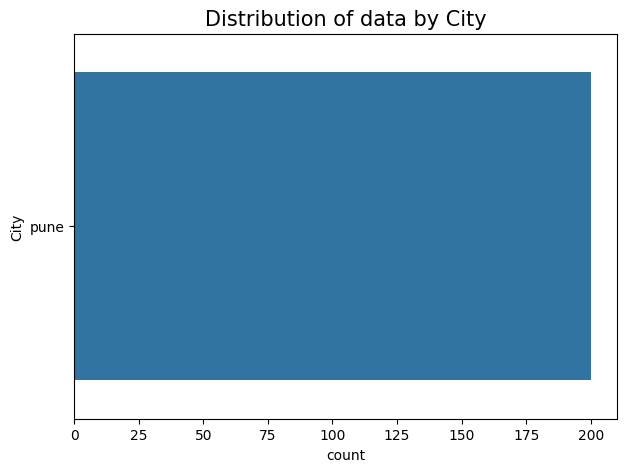

In [40]:
# Location
print(f"Unique Number of Cities in the Data: {df1.City.nunique()}")

display(df1.groupby('City')['Company Name Cleaned'].count().reset_index())

plt.figure(figsize=(7,5))
sns.countplot(df1['City'])
plt.title("Distribution of data by City",size=15)
plt.show()

Unique Number of Sub-Area in the Data: 34


,Sub-Area Cleaned,City
13,kharadi,16
2,baner,12
27,ravet,12
8,handewadi,11
3,bavdhan,10
5,bt kawade rd,10
33,wadgaon sheri,9
9,hinjewadi,9
20,mahalunge,9
24,nibm,8


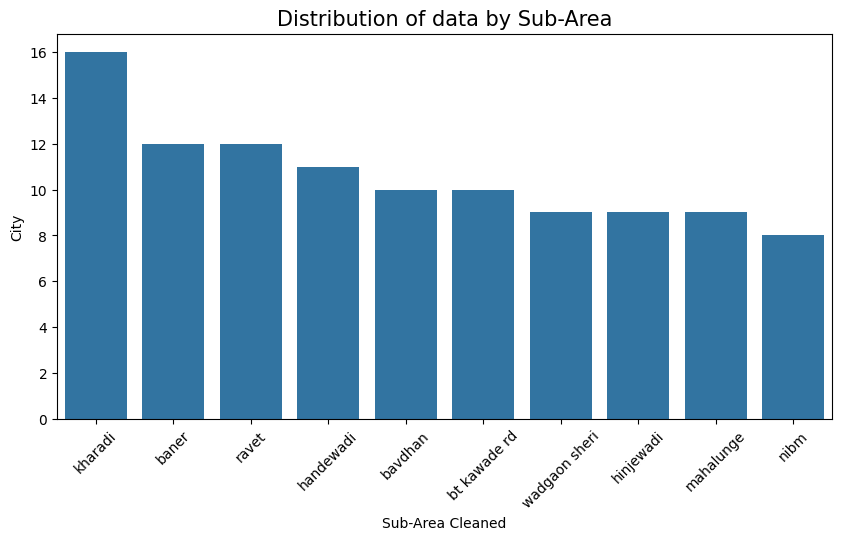

In [41]:
# Sub-Area
print(f"Unique Number of Sub-Area in the Data: {df1['Sub-Area Cleaned'].nunique()}")

temp = df1.groupby('Sub-Area Cleaned')['City'].count().reset_index().sort_values(by='City',ascending=False)[:10]
display(temp)

plt.figure(figsize=(10,5))
sns.barplot(x=temp['Sub-Area Cleaned'],y=temp['City'])
plt.title("Distribution of data by Sub-Area",size=15)
plt.xticks(rotation=45)
plt.show()

#### Distribution of Company and Township:

([Contents:](#Contents:))

Unique Number of Company in the Data: 37


,Company Name Cleaned,City
0,mantra properties,29
1,kundan spaces,14
2,unique properties,11
3,jhala group,10
4,shapoorji paloonji,10
5,vijaya laxmi creations,9
6,puraniks,8
7,ravima ventures,7
8,nirman developers,6
9,lush life,6


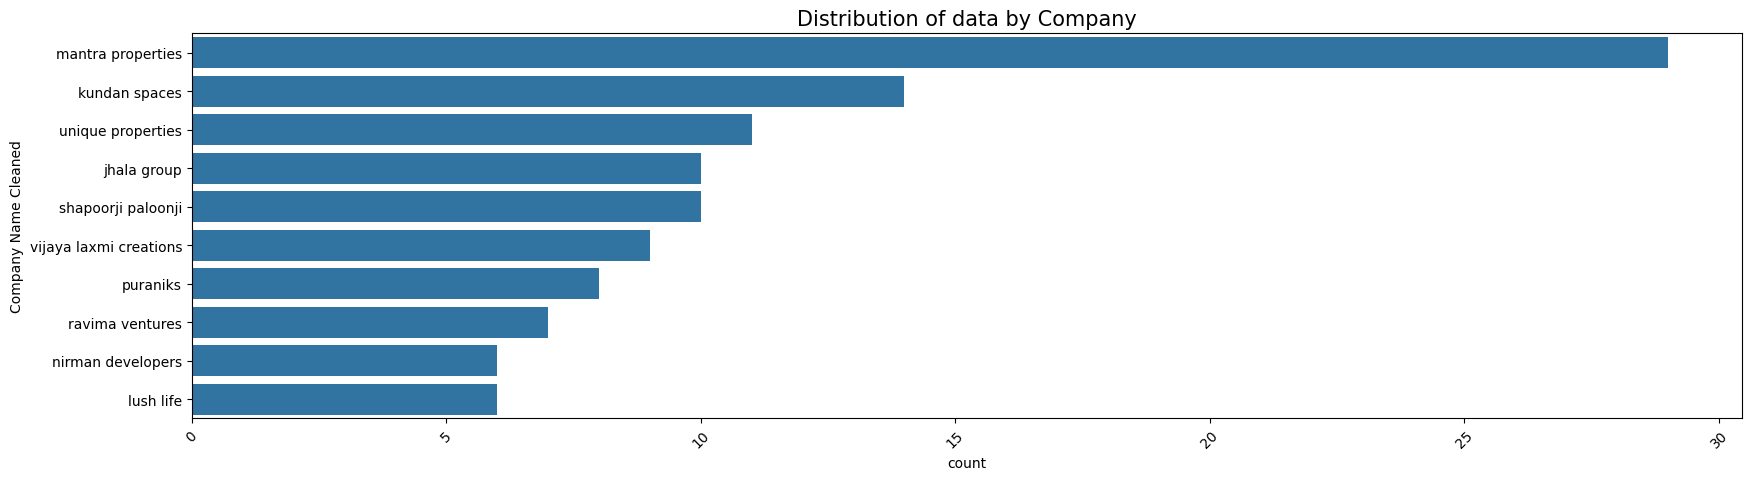

In [42]:
# Company
print(f"Unique Number of Company in the Data: {df1['Company Name Cleaned'].nunique()}")

display(df1.groupby('Company Name Cleaned')['City'].count().sort_values(ascending=False).reset_index()[:10])

plt.figure(figsize=(20,5))
sns.countplot(df1['Company Name Cleaned'],
              order=df1.groupby('Company Name Cleaned')['City'].count().sort_values(ascending=False).index[:10])
plt.title("Distribution of data by Company",size=15)
plt.xticks(rotation=45)
plt.show()

Unique Number of Township/Society in the Data: 54


,TownShip Name/ Society Name Cleaned,City
0,mantra 29 gold,13
1,eternia 2.0,8
2,k ville,6
3,impero,6
4,brookefield willows,6
5,abitante fiore,6
6,satyam shery,6
7,parklane urbanjoy,6
8,satyam serenity,6
9,presidia,6


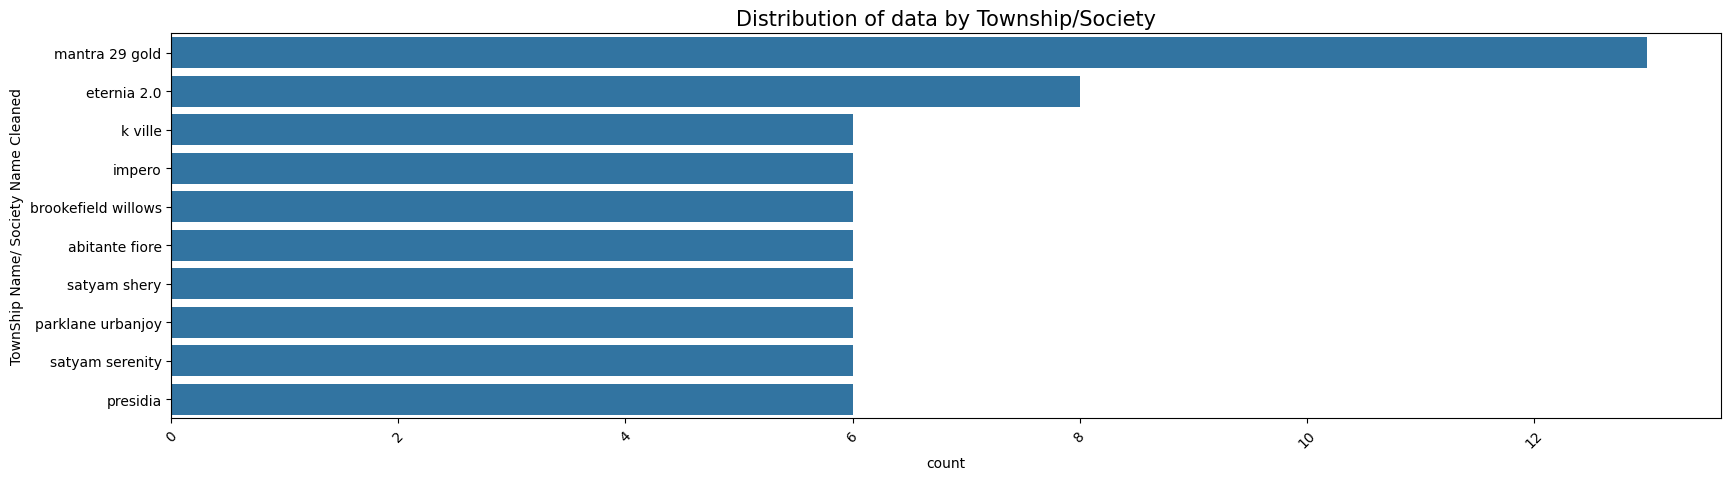

In [43]:
# Township
print(f"Unique Number of Township/Society in the Data: {df1['TownShip Name/ Society Name Cleaned'].nunique()}")

display(df1.groupby('TownShip Name/ Society Name Cleaned')['City'].count().sort_values(ascending=False)
          .reset_index()[:10])

plt.figure(figsize=(20,5))
sns.countplot(df1['TownShip Name/ Society Name Cleaned'],
              order=df1.groupby('TownShip Name/ Society Name Cleaned')['City'].count()
                      .sort_values(ascending=False).index[:10])
plt.title("Distribution of data by Township/Society",size=15)
plt.xticks(rotation=45)
plt.show()

#### Distribution of Property Area and Price:

([Contents:](#Contents:))

Summary Statistics of Property Area:


,Property Area in Sq. Ft. Cleaned
count,200.000000
mean,894.060000
std,380.256831
min,113.000000
25%,670.000000
50%,800.500000
75%,1041.250000
max,2447.000000


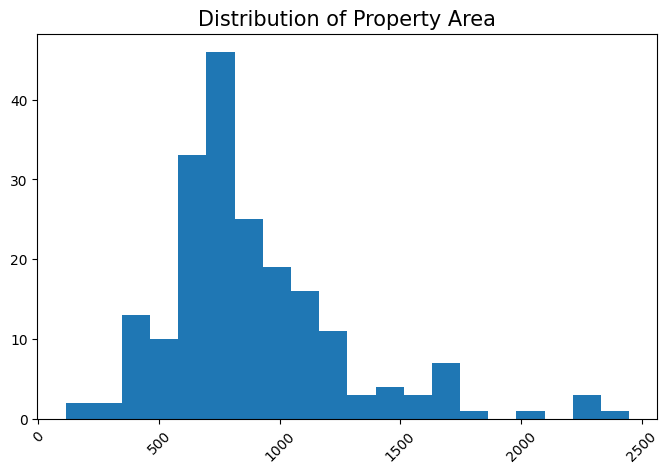

In [44]:
print("Summary Statistics of Property Area:")
display(df1[['Property Area in Sq. Ft. Cleaned']].describe())

plt.figure(figsize=(8,5))
plt.hist(df1['Property Area in Sq. Ft. Cleaned'],bins=20)
plt.title("Distribution of Property Area",size=15)
plt.xticks(rotation=45)
plt.show()

Summary Statistics of Price:


,Price in lakhs Cleaned
count,199.000000
mean,95.258291
std,101.869843
min,13.190000
25%,51.500000
50%,70.000000
75%,99.435000
max,930.000000


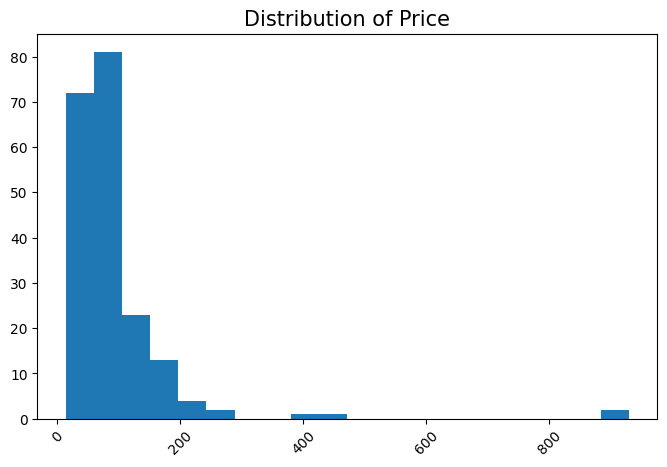

In [45]:
print("Summary Statistics of Price:")
display(df1[['Price in lakhs Cleaned']].describe())

plt.figure(figsize=(8,5))
plt.hist(df1['Price in lakhs Cleaned'],bins=20)
plt.title("Distribution of Price",size=15)
plt.xticks(rotation=45)
plt.show()

In [46]:
df1.head()

,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


* How Property area correlates with the price?

* How each amenities correlates with the price?

* Create sum of all amenities and check how many Townships have all of it? And how the value of those properite vaires wrt others?

## Multivariate Analysis:

([Contents:](#Contents:))

Multivariate analysis helps us to understand how two or more columns are related to each other and its relationship with the target variable.

Based on the initial understanding of the different columns in the data (univariate analysis), we can create some hypothesis (if any) or try to ask more complex questions such as:
* How Property area correlates with the price?
* How each amenities correlates with the price?
* What are the 3 main amenities that the top 10% priced properties have?

This is not the exhaustive list but good to start with.

#### How Property area correlates with the price?

([Contents:](#Contents:))

In [56]:
# Property Area vs Price
temp = df1[['Property Area in Sq. Ft. Cleaned','Price in lakhs Cleaned']]

display(temp.describe())

corr_matrix = temp.corr()
print(corr_matrix['Price in lakhs Cleaned'])

plt.figure(figsize=(8,5))
sns.scatterplot(temp['Property Area in Sq. Ft. Cleaned'],temp['Price in lakhs Cleaned'])
plt.title("Property Area vs Price",size=15)
plt.xticks(rotation=45)
plt.show()

KeyError: "None of [Index(['Property Area in Sq. Ft. Cleaned', 'Price in lakhs Cleaned'], dtype='object')] are in the [columns]"

Các cột trong DataFrame: Index(['Sr. No.', 'Location', 'Sub-Area', 'Propert Type',
       'Property Area in Sq. Ft.', 'Price in lakhs', 'Price in Millions',
       'Company Name', 'TownShip Name/ Society Name',
       'Total TownShip Area in Acres', 'ClubHouse',
       'School / University in Township ', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym',
       'Description'],
      dtype='object')
Các cột sau khi loại bỏ khoảng trắng: Index(['Sr. No.', 'Location', 'Sub-Area', 'Propert Type',
       'Property Area in Sq. Ft.', 'Price in lakhs', 'Price in Millions',
       'Company Name', 'TownShip Name/ Society Name',
       'Total TownShip Area in Acres', 'ClubHouse',
       'School / University in Township', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym',
       'Description'],
      dtype='object')
Lỗi KeyError: "None of [Index(['Property Area in Sq. Ft. Cleaned', 'Price in lakhs Clean

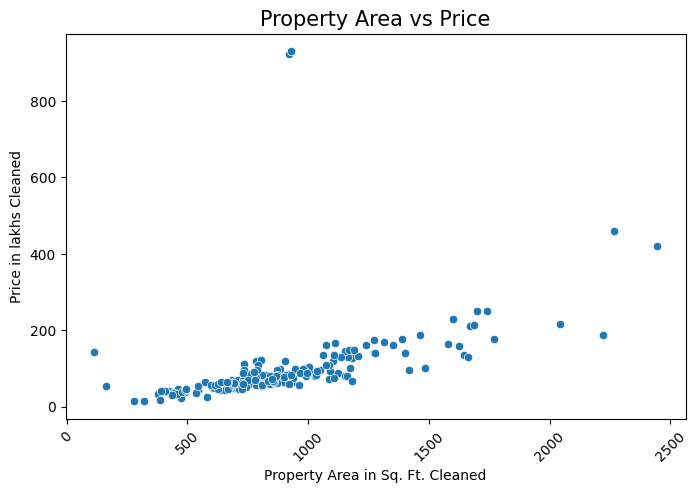

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df1 = pd.read_excel('E:/11Estate-Price/modular_code/input/Pune Real Estate Data.xlsx')

# Kiểm tra tên cột
print("Các cột trong DataFrame:", df1.columns)

# Loại bỏ khoảng trắng thừa trong tên cột
df1.columns = df1.columns.str.strip()

# Kiểm tra lại tên cột sau khi loại bỏ khoảng trắng
print("Các cột sau khi loại bỏ khoảng trắng:", df1.columns)

# Property Area vs Price
try:
    temp = df1[['Property Area in Sq. Ft. Cleaned', 'Price in lakhs Cleaned']]
except KeyError as e:
    print(f"Lỗi KeyError: {e}")

# Nếu temp được tạo thành công, thực hiện mô tả dữ liệu
if 'temp' in locals():
    print(temp.describe())
    
    # Ma trận tương quan
    corr_matrix = temp.corr()
    print(corr_matrix['Price in lakhs Cleaned'])

    # Vẽ biểu đồ phân tán
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=temp, x='Property Area in Sq. Ft. Cleaned', y='Price in lakhs Cleaned')
    plt.title("Property Area vs Price", size=15)
    plt.xticks(rotation=45)
    plt.show()


In [83]:
# Property Area vs Price
temp = df1[['Property Area in Sq. Ft.','Price in lakhs']]

display(temp.describe())

corr_matrix = temp.corr()
print(corr_matrix['Price in lakhs'])

plt.figure(figsize=(8,5))
sns.scatterplot(temp['Property Area in Sq. Ft.'],temp['Price in lakhs'])
plt.title("Property Area vs Price",size=15)
plt.xticks(rotation=45)
plt.show()

,Property Area in Sq. Ft.,Price in lakhs
count,200,200
unique,179,150
top,670,65
freq,4,5


ValueError: could not convert string to float: '877 to 912'

Các giá trị duy nhất trong cột 'Property Area in Sq. Ft.':
[492 774 889 1018 743 975 '877 to 912' '1077 to 1272' 905 1125 1644 2220
 '662 to 845' '890 to 1212' 423 665 '792 to 965' 462 666 750 1030 446 796
 842 865 902 1154 872 934 1088 1109 1163 1419 1485 684 990 882 1103 543
 '801 to 1125' '1272 to 2138' 320 473 581 790 820 989 1003 1182 1579 163
 491 659 732 809 460 734 753 675 917 670 740 847 936 1032 1698 2267 725
 731 744 923 930 792 1180 860 988 1093 456 644 785 1060 113 664 673 682
 698 1239 1315 1388 1463 1671 1687 575 751 761 871 1166 1206 1272 1279 646
 717 436 637 642 655 668 810 735 783 805 1074 1111 535 947 697 711 980
 1400 1772 1662 705 726 793 904 1168 1189 479 693 808 1086 844 873 606 611
 626 691 835 854 715 '624 to 761' 968 996 1038 489 598 616 692 867 908
 1624 2043 727 '561 to 902' '1056 to 1091' 408 546 629 378 494 780 850 900
 '1181, 1364' 1740 2447 405 392 667 641 280 385 730 '1070 to 1200'
 '1300 to 1400' '1600 +' '769 to 809 ' '1101 to 1113' 776]

Các giá trị

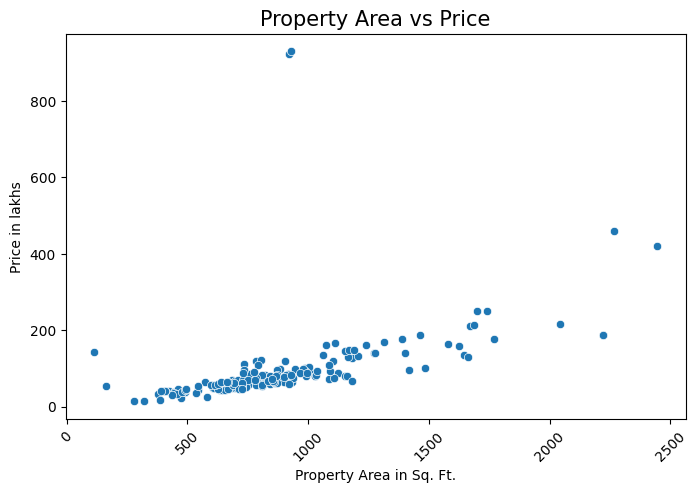

In [74]:
import pandas as pd
import numpy as np

# Đọc dữ liệu
df1 = pd.read_excel('E:/11Estate-Price/modular_code/input/Pune Real Estate Data.xlsx')

# Kiểm tra các giá trị duy nhất trong các cột
print("Các giá trị duy nhất trong cột 'Property Area in Sq. Ft.':")
print(df1['Property Area in Sq. Ft.'].unique())

print("\nCác giá trị duy nhất trong cột 'Price in lakhs':")
print(df1['Price in lakhs'].unique())

# Chuyển đổi cột sang kiểu số
df1['Property Area in Sq. Ft.'] = pd.to_numeric(df1['Property Area in Sq. Ft.'], errors='coerce')
df1['Price in lakhs'] = pd.to_numeric(df1['Price in lakhs'], errors='coerce')

# Kiểm tra lại dữ liệu
print("\nDữ liệu sau khi chuyển đổi:")
print(df1[['Property Area in Sq. Ft.', 'Price in lakhs']].head())

# Loại bỏ hàng có giá trị NaN sau khi chuyển đổi
df1 = df1.dropna(subset=['Property Area in Sq. Ft.', 'Price in lakhs'])

# Tính toán mô tả và tương quan
temp = df1[['Property Area in Sq. Ft.', 'Price in lakhs']]
print(temp.describe())

# Tính toán ma trận tương quan
corr_matrix = temp.corr()
print(corr_matrix['Price in lakhs'])

# Vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=temp['Property Area in Sq. Ft.'], y=temp['Price in lakhs'])
plt.title("Property Area vs Price", size=15)
plt.xticks(rotation=45)
plt.show()


#### How each amenities correlates with the price?

([Contents:](#Contents:))

In [57]:
df1.head(2)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...


In [89]:
feats_to_plot = df1.columns.tolist()[8:15]
print(len(feats_to_plot))

7


ValueError: Unable to parse string "Null" at position 41

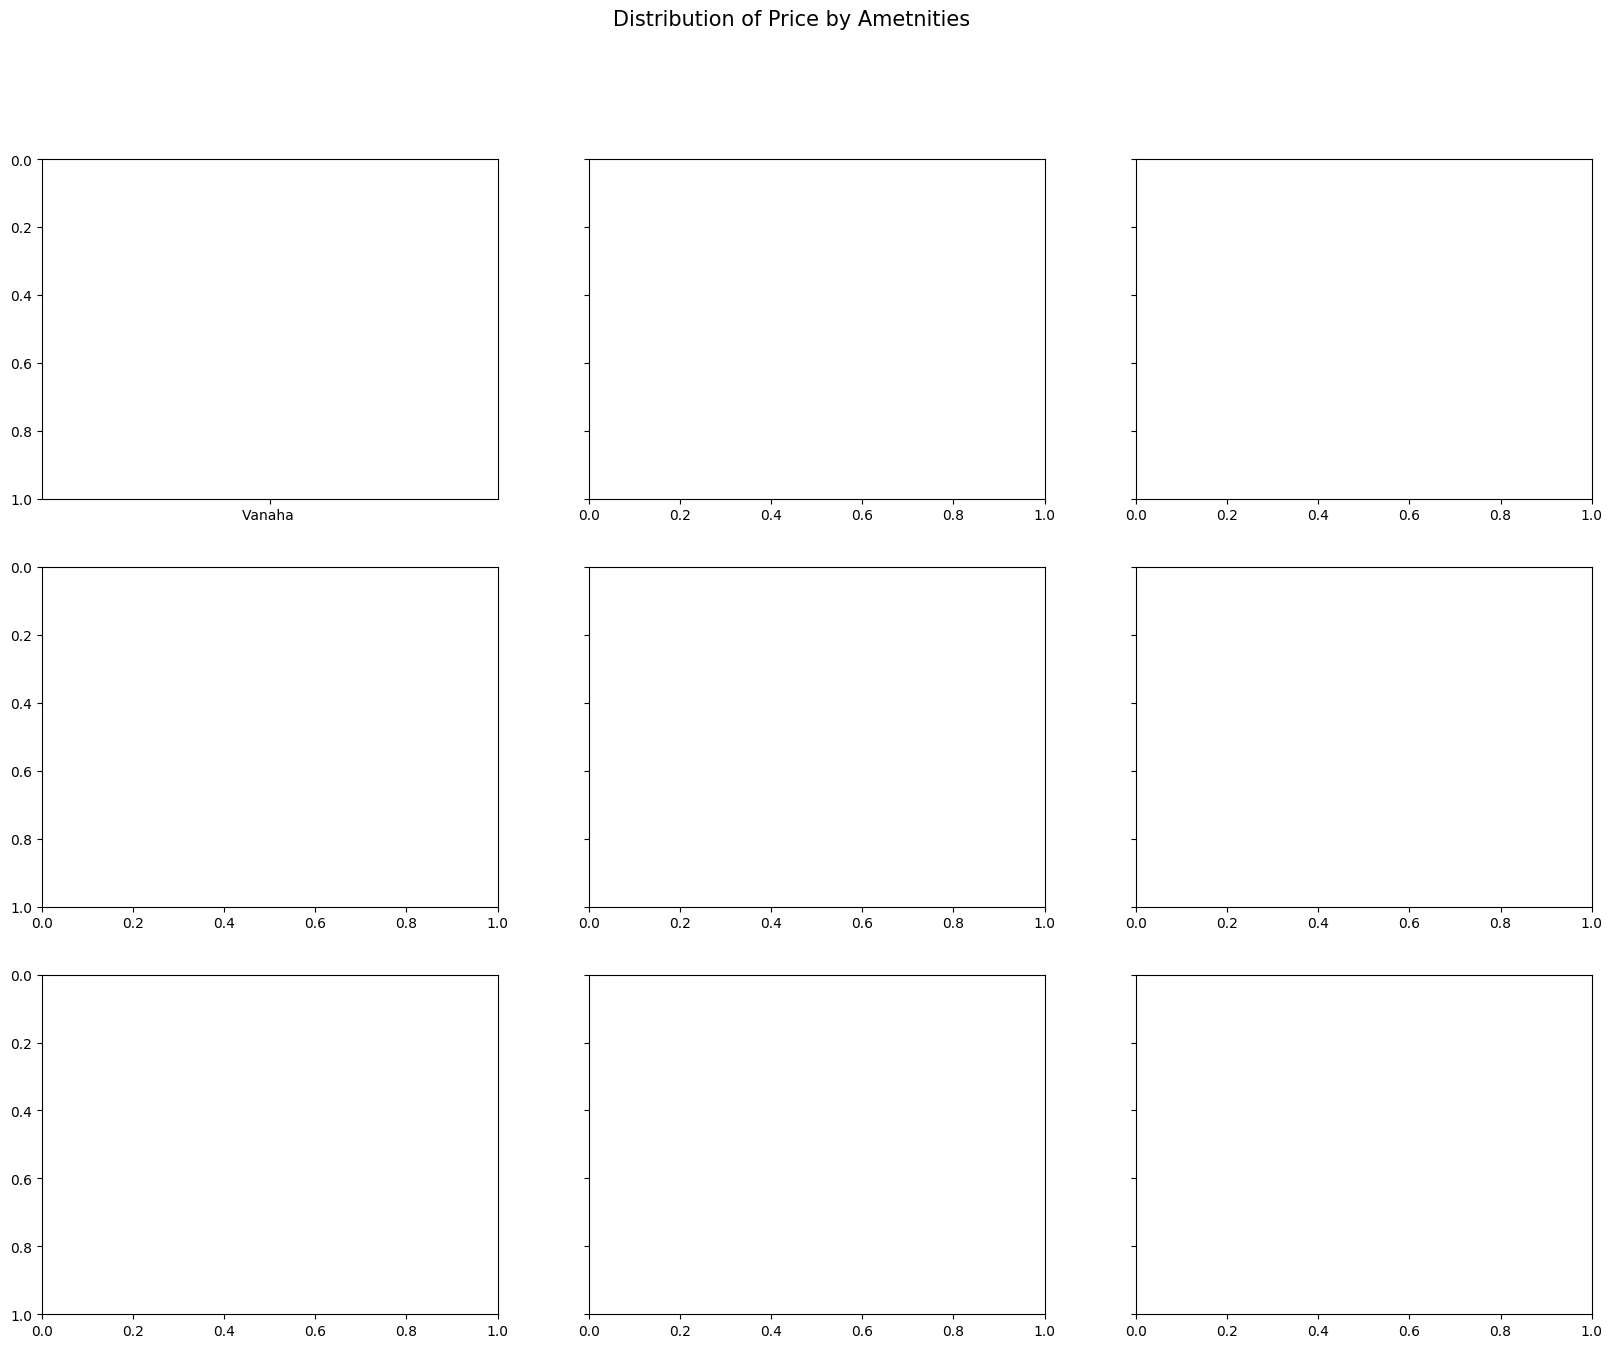

In [91]:
fig,ax = plt.subplots(nrows=3,ncols=3,sharey=True,figsize=(20,15))
plt.suptitle("Distribution of Price by Ametnities",size=15)
for i, col in enumerate(feats_to_plot):
        sns.violinplot(x=df1[col], y=df1['Price in lakhs'], ax=ax[i // 3, i % 3])
  

#### What are the 3 main amenities that the top 10% priced properties have?

([Contents:](#Contents:))

In [79]:
# Filter for top 10% priced properties 
df1[['Price in lakhs']].describe()

,Price in lakhs
count,200
unique,150
top,65
freq,5


In [86]:
# selecting threshold as 80 Lakhs
amenities_cols = df1.columns.tolist()[8:15]

temp = df1[df1['Price in lakhs Cleaned']>=80][amenities_cols].sum().reset_index()
temp.rename(columns={'index':'Amenities',0:'Popularity'},inplace=True)
temp = temp.sort_values(by='Popularity',ascending=False)
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Amenities'],y=temp['Popularity'])
plt.title("Top Amenities in the Premium properties",size=15)
plt.xticks(rotation=60)
plt.show()

KeyError: 'Price in lakhs Cleaned'

## Treating Nulls and saving the data:

([Contents:](#Contents:))

In [92]:
df1.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...


In [93]:
df1.isna().sum()

Sr. No.                               0
Location                              0
Sub-Area                              0
Propert Type                          0
Property Area in Sq. Ft.              0
Price in lakhs                        0
Price in Millions                     1
Company Name                          0
TownShip Name/ Society Name           0
Total TownShip Area in Acres        149
ClubHouse                             0
School / University in Township       0
Hospital in TownShip                  0
Mall in TownShip                      0
Park / Jogging track                  0
Swimming Pool                         0
Gym                                   0
Description                           0
dtype: int64

In [94]:
df_final = df1.dropna()
df_final.isna().sum()

Sr. No.                             0
Location                            0
Sub-Area                            0
Propert Type                        0
Property Area in Sq. Ft.            0
Price in lakhs                      0
Price in Millions                   0
Company Name                        0
TownShip Name/ Society Name         0
Total TownShip Area in Acres        0
ClubHouse                           0
School / University in Township     0
Hospital in TownShip                0
Mall in TownShip                    0
Park / Jogging track                0
Swimming Pool                       0
Gym                                 0
Description                         0
dtype: int64

In [49]:
# Saving the final dataframe with selected features as a csv file
# df_final.to_csv('data/real_estate_selected.csv',index=False)